In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import skimage.exposure
import numpy as np
from numpy.random import default_rng

def random_quadrillage_generator(indice=1, width=500, height=500, sigmaX=10, sigmaY=10, thresh=200, blur=11):
  # define random seed to change the pattern
  rng = default_rng()
  # create random noise image
  noise = rng.integers(0, 255, (height,width), np.uint8, True)

  # blur the noise image to control the size
  blur = cv2.GaussianBlur(noise, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)

  # stretch the blurred image to full dynamic range
  stretch = skimage.exposure.rescale_intensity(blur, in_range='image', out_range=(0,255)).astype(np.uint8)

  # threshold stretched image to control the size
  thresh = cv2.threshold(stretch, thresh, 255, cv2.THRESH_BINARY)[1]
  # apply morphology open and close to smooth out shapes
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
  horizantal = np.random.randint(4, 15)
  verticale = np.random.randint(4, 15)

  for i in range (1, horizantal + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    #fact = 50
    h = 99 + i*ponte + fact
    cv2.line(result, (100,h), (400,h), (255,0,0), 2)
  for i in range(1, verticale + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    v = 119 + i*ponte + fact
    cv2.line(result, (v,100), (v,400), (255,0,0), 2)

  guess = np.random.randint(0, 2)
  print(f"guess: {guess}")
  if guess == 0:
    # Rotation
    rot = np.random.randint(-15, 15)
    (h, w) = result.shape[:2]
    center = (w / 2, h / 2)
    angle = rot
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    result= cv2.warpAffine(result, M, (w, h))
   # save result
  return result

In [3]:
def random_gravillonage_generator(indice=1, width=500, height=500, sigmaX=10, sigmaY=10, thresh=175, blur=0, path='/content/drive/MyDrive/test/'):
  # define random seed to change the pattern
  rng = default_rng()
  # create random noise image
  noise = rng.integers(0, 255, (height,width), np.uint8, True)

  # blur the noise image to control the size
  blur = cv2.GaussianBlur(noise, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)

  # stretch the blurred image to full dynamic range
  stretch = skimage.exposure.rescale_intensity(blur, in_range='image', out_range=(0,255)).astype(np.uint8)

  # threshold stretched image to control the size
  thresh = cv2.threshold(stretch, thresh, 255, cv2.THRESH_BINARY)[1]

  # apply morphology open and close to smooth out shapes
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)

  # save result
  return result

In [ ]:
# train
for i in range(1, 6000):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(150, 200)
  while True:
    blur = np.random.randint(0,9)
    if not blur%2 == 0:
      break
  result_grav = random_gravillonage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result_quad = random_quadrillage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  choix = np.random.randint(1, 4)
  print(f"choix: {choix}")
  if choix ==1:
    result = np.append(result_quad, result_grav, axis=0)
  elif choix ==2:
    result = result_quad
  else:
    result = result_grav
  intensity = np.random.randint(180, 255)
  while True:
    wid_plus = np.random.randint(100, 200)
    hei_plus = np.random.randint(100, 200)
    if wid_plus % 2 == 0 and hei_plus % 2 == 0:
      break
  blanc = np.zeros((result.shape[0]+wid_plus, result.shape[1]+hei_plus)) + intensity
  blanc[wid_plus//2:blanc.shape[0]-wid_plus//2 , hei_plus//2:blanc.shape[1]-hei_plus//2] = result
  cv2.imwrite('/content/plaque_datasets/train/plaque/'f'{i}.jpg', blanc)

# validation
for i in range(1, 600):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(150, 200)
  while True:
    blur = np.random.randint(0,9)
    if not blur%2 == 0:
      break
  result_grav = random_gravillonage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result_quad = random_quadrillage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  choix = np.random.randint(1, 4)
  print(f"choix: {choix}")
  if choix ==1:
    result = np.append(result_quad, result_grav, axis=0)
  elif choix ==2:
    result = result_quad
  else:
    result = result_grav
  intensity = np.random.randint(180, 255)
  while True:
    wid_plus = np.random.randint(100, 200)
    hei_plus = np.random.randint(100, 200)
    if wid_plus % 2 == 0 and hei_plus % 2 == 0:
      break
  blanc = np.zeros((result.shape[0]+wid_plus, result.shape[1]+hei_plus)) + intensity
  blanc[wid_plus//2:blanc.shape[0]-wid_plus//2 , hei_plus//2:blanc.shape[1]-hei_plus//2] = result
  cv2.imwrite('/content/plaque_datasets/validation/plaque/'f'{i}.jpg', blanc)

# test
for i in range(1, 200):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(150, 200)
  while True:
    blur = np.random.randint(0,9)
    if not blur%2 == 0:
      break
  result_grav = random_gravillonage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result_quad = random_quadrillage_generator(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  choix = np.random.randint(1, 4)
  print(f"choix: {choix}")
  if choix ==1:
    result = np.append(result_quad, result_grav, axis=0)
  elif choix ==2:
    result = result_quad
  else:
    result = result_grav
  intensity = np.random.randint(180, 255)
  while True:
    wid_plus = np.random.randint(100, 200)
    hei_plus = np.random.randint(100, 200)
    if wid_plus % 2 == 0 and hei_plus % 2 == 0:
      break
  blanc = np.zeros((result.shape[0]+wid_plus, result.shape[1]+hei_plus)) + intensity
  blanc[wid_plus//2:blanc.shape[0]-wid_plus//2 , hei_plus//2:blanc.shape[1]-hei_plus//2] = result
  cv2.imwrite('/content/plaque_datasets/test/test_subdirc/'f'{i}.jpg', blanc)

In [5]:
# train
for i in range(1,6000):
  rng = default_rng()
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  # create random noise image
  h = np.random.randint(0, 230)
  result = rng.integers(h, 255, (width,height), np.uint8, True)
  choix = np.random.randint(0, 3)
  if choix == 0:
    sigmaX = np.random.randint(1, 15)
    sigmaY = np.random.randint(1, 15)
    thresh = np.random.randint(100, 230)
    while True:
      blur = np.random.randint(0,14)
      if not blur%2 == 0:
        break
    result = cv2.GaussianBlur(result, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)
  elif choix == 1:
    color = np.random.randint(0, 255)
    result = np.zeros((width, height), np.uint8) + color
  elif choix == 2:
    color = np.random.randint(0, 255)
    blank = np.zeros((width, height), np.uint8) + color
    result = np.append(blank, result, axis=0)
  cv2.imwrite('/content/plaque_datasets/train/non plaque/'f'{i}.jpg', result)

# validation
for i in range(1, 600):
  rng = default_rng()
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  # create random noise image
  h = np.random.randint(0, 230)
  result = rng.integers(h, 255, (width, height), np.uint8, True)
  choix = np.random.randint(0, 3)
  if choix == 0:
    sigmaX = np.random.randint(1, 15)
    sigmaY = np.random.randint(1, 15)
    thresh = np.random.randint(100, 230)
    while True:
      blur = np.random.randint(0,14)
      if not blur%2 == 0:
        break
    result = cv2.GaussianBlur(result, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)
  elif choix == 1:
    color = np.random.randint(0, 255)
    result = np.zeros((width, height), np.uint8) + color
  elif choix == 2:
    color = np.random.randint(0, 255)
    blank = np.zeros((width, height), np.uint8) + color
    result = np.append(blank, result, axis=0)
  cv2.imwrite('/content/plaque_datasets/validation/non plaque/'f'{i}.jpg', result)
# test
for i in range(1, 200):
  rng = default_rng()
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  # create random noise image
  h = np.random.randint(0, 230)
  result = rng.integers(h, 255, (width, height), np.uint8, True)
  choix = np.random.randint(0, 3)
  if choix == 0:
    sigmaX = np.random.randint(1, 15)
    sigmaY = np.random.randint(1, 15)
    thresh = np.random.randint(100, 230)
    while True:
      blur = np.random.randint(0,14)
      if not blur%2 == 0:
        break
    result = cv2.GaussianBlur(result, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)
  elif choix == 1:
    color = np.random.randint(0, 255)
    result = np.zeros((width, height), np.uint8) + color
  elif choix == 2:
    color = np.random.randint(0, 255)
    blank = np.zeros((width, height), np.uint8) + color
    result = np.append(blank, result, axis=0)
  cv2.imwrite('/content/plaque_datasets/test/test_subdirc/'f'{i}_{i}.jpg', result)

In [ ]:
!zip -r /content/plaque_datasets.zip /content/plaque_datasets

In [12]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PATH = '/content/plaque_datasets'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
total_train, total_val, total_test

(11998, 1397, 2)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator =  ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen =  train_image_generator.flow_from_directory(train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size,class_mode='binary', seed=42)
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size,class_mode='binary',seed=42)
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode= None,
    shuffle=False,
    classes=['test_subdirc'] ,
    seed=42,
)

Found 11998 images belonging to 3 classes.
Found 1397 images belonging to 3 classes.
Found 398 images belonging to 1 classes.


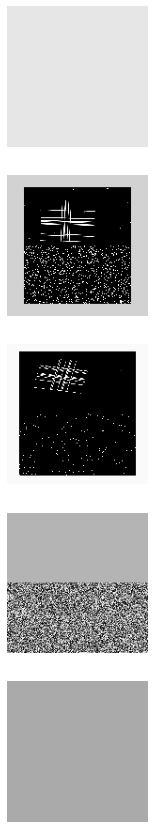

In [11]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', 
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'softmax'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),
                metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 74, 74, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 5, 5, 64)          73792     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 batch_normalization_29 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
          

In [32]:
step = total_train//batch_size
val_step = (total_val//batch_size)

In [ ]:
history = model.fit(train_data_gen,
        steps_per_epoch=step,
        epochs=30,
        validation_data=val_data_gen,
        validation_steps=val_step)

Epoch 1/30
48/93 [==============>...............] - ETA: 4:38 - loss: -187143602176.0000 - accuracy: 0.4992

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities[probabilities > 0.5] = 1
probabilities[probabilities < 0.5] = 0
probabilities

In [ ]:
model.save('/content/drive/MyDrive/model_plaqueornot.h5')